In [ ]:
!pip install tensorflow keras numpy matplotlib mnist

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# /content/gdrive/HDR
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 16_01_04_100_1.html   Auction.inc.gform     'CSE 3.1'	  Quiz02_160104100.pdf
'160104100 (1).pdf'    B2_160104100_01.html  'CSE 4.1'	  RSVP.gform
'160104100 (1).py'     B2_160104100_02.html  'CSE 4.2'	  September.xlsx
 16_01_04_100_2.html   B2_160104100_03.html  'DEBUG BD'   Soft_Computing
 16_01_04_100_3.html   B2_160104100.m	      Lee	  Temp
 160104100.html        Classroom	      Music.rar   THESIS
 160104100.pdf	      'Colab Notebooks'      'My Drive'   XIAN
 160104100.py	      'CSE 1.2'		      oneplus
 160104100.zip	      'CSE 2.1'		      Pigeons
 APP		      'CSE 2.2'		      PUBLIC


In [ ]:
# import packages
import numpy as np
import mnist                                                #for the datasets
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential       #Sequential is the ANN architecture
from tensorflow.python.keras.layers import Dense            #The Layers in the ANN (Artificial Neural Network)
from keras.utils import to_categorical
from tensorflow.python.keras.models import model_from_json
import pandas as pd
from PIL import Image
from keras.optimizers import Adam

Under the "Images" folder you should see 10 folders numbered 51 to 59. 

Under each folder you should find file names with the following format

01_0001_0_08_0916_1990_1.png

where:

The first 2 digits indicate the district from which the sample was collected. There are only two districts currently.

The next  4 digits are an institution identifier (the institution from which the sample was collected).

The next  1 digit signifies the gender of the subject giving the sample. 0 for male, 1 for female.

The next  2 digits holds the age of the subject giving the sample.

The next  4 digits shows the month and day of the year 2016 on which the sample was collected.

The next  4 digits is the serial number of the form which was used the collect the sample.

The next  1 digit is the character class of the sample (there are 84 classes). This number should match the directory name.



In [ ]:
import os
# LOADING DATASET IMAGES
base_dir = '/content/gdrive/My Drive/HDR'
dataset = os.path.join(base_dir, 'DATASET')

number0 = os.path.join(dataset, '51')
number1 = os.path.join(dataset, '52')
number2 = os.path.join(dataset, '53')
number3 = os.path.join(dataset, '54')
number4 = os.path.join(dataset, '55')
number5 = os.path.join(dataset, '56')
number6 = os.path.join(dataset, '57')
number7 = os.path.join(dataset, '58')
number8 = os.path.join(dataset, '59')
number9 = os.path.join(dataset, '60')

fnames_0 = os.listdir(number0)
fnames_1 = os.listdir(number1)
fnames_2 = os.listdir(number2)
fnames_3 = os.listdir(number3)
fnames_4 = os.listdir(number4)
fnames_5 = os.listdir(number5)
fnames_6 = os.listdir(number6)
fnames_7 = os.listdir(number7)
fnames_8 = os.listdir(number8)
fnames_9 = os.listdir(number9)
#print(fnames_0[:10])


(95, 95)


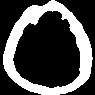

In [ ]:


img = Image.open(number0+'/'+fnames_0[11]).convert('L') #RGBA
arr = np.array(img)

# record the original shape
shape = arr.shape
print(shape)

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

# do something to the vector
#vector[:,::10] = 128

# reform a numpy array of the original shape
arr2 = np.asarray(vector).reshape(shape)

# make a PIL image
img2 = Image.fromarray(arr2, 'L')
#img2.show()
display(img2)

In [ ]:
# Resizing Image
def resize_image(img):
  new_width  = 28
  new_height = 28
  img = img.resize((new_width, new_height), Image.ANTIALIAS)
  return img

In [ ]:
# Converting real image to 1D array

X = []
Y = []

for f in fnames_0:
  img = Image.open(number0+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X.append(flat_arr)
  Y.append(0)

X1 = []
Y1 = []

for f in fnames_1:
  img = Image.open(number1+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X1.append(flat_arr)
  Y1.append(1)

X2 = []
Y2 = []

for f in fnames_2:
  img = Image.open(number2+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X2.append(flat_arr)
  Y2.append(2)

X3 = []
Y3 = []

for f in fnames_3:
  img = Image.open(number3+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X3.append(flat_arr)
  Y3.append(3)

X4 = []
Y4 = []

for f in fnames_4:
  img = Image.open(number4+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X4.append(flat_arr)
  Y4.append(4)

X5 = []
Y5 = []

for f in fnames_5:
  img = Image.open(number5+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X5.append(flat_arr)
  Y5.append(5)

X6 = []
Y6 = []

for f in fnames_6:
  img = Image.open(number6+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X6.append(flat_arr)
  Y6.append(6)

X7 = []
Y7 = []

for f in fnames_7:
  img = Image.open(number7+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X7.append(flat_arr)
  Y7.append(7)

X8 = []
Y8 = []

for f in fnames_8:
  img = Image.open(number8+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X8.append(flat_arr)
  Y8.append(8)

X9 = []
Y9 = []

for f in fnames_9:
  img = Image.open(number9+'/'+f).convert('L') #RGBA

  img = resize_image(img)
  arr = np.array(img)

  # record the original shape
  shape = arr.shape
  #print(shape)

  # make a 1-dimensional view of arr
  flat_arr = arr.ravel()
  #print(flat_arr.shape)
  
  X9.append(flat_arr)
  Y9.append(9)

In [ ]:
# Saving Data to csv


my_df = pd.DataFrame(X)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number0+'x.csv', index=False) 

my_df = pd.DataFrame(X1)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number1+'x.csv', index=False) 


my_df = pd.DataFrame(X2)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number2+'x.csv', index=False) 


my_df = pd.DataFrame(X3)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number3+'x.csv', index=False) 


my_df = pd.DataFrame(X4)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number4+'x.csv', index=False) 


my_df = pd.DataFrame(X5)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number5+'x.csv', index=False) 


my_df = pd.DataFrame(X6)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number6+'x.csv', index=False) 


my_df = pd.DataFrame(X7)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number7+'x.csv', index=False) 


my_df = pd.DataFrame(X8)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number8+'x.csv', index=False) 


my_df = pd.DataFrame(X9)  #converting it to a pandas dataframe
# save as csv 
my_df.to_csv(number9+'x.csv', index=False) 


In [ ]:
# Reading data from CSV file

bangla_dataset_X = pd.DataFrame()
bangla_dataset_Y = []

for i in range(51,61):
  path = '/content/gdrive/My Drive/HDR/DATASET/CSV/'
  df = pd.read_csv(path+str(i)+'x.csv')
  bangla_dataset_X = bangla_dataset_X.append(df)
  print(df.shape)
  for j in range(0, len(df)):
    bangla_dataset_Y.append((i-51)+10)
  #print(df.shape)

bangla_dataset_Y = pd.DataFrame(bangla_dataset_Y)


(1982, 784)
(1982, 784)
(1953, 784)
(1975, 784)
(1980, 784)
(1986, 784)
(1981, 784)
(1958, 784)
(1984, 784)
(1967, 784)


In [ ]:
# Print Shape

print(bangla_dataset_X.shape)   #(19748, 784)
print(bangla_dataset_Y.shape)   #(19748, 1)

(19748, 784)
(19748, 1)


In [ ]:
# loading Mnist datasets
minist_train_images = mnist.train_images()     # Training images
minist_train_labels = mnist.train_labels()     # Training labels 

minist_test_images = mnist.test_images()       # Testing images
minist_test_labels = mnist.test_labels()       # Testing labels


In [ ]:
# normalizing the images. Normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train
#bangla_dataset_X = (bangla_dataset_X/255) - 0.5

minist_train_images = (minist_train_images/255) - 0.5
minist_test_images = (minist_test_images/255) - 0.5

#Flattening the images. Faltten eac 28*28 into a 28*28=784 dimention vector to pass into neural network
minist_train_images = minist_train_images.reshape((-1, 784))
minist_test_images = minist_test_images.reshape((-1, 784))

print(minist_train_images.shape) #60,000 rows and 784 columns
print(minist_test_images.shape)  #10,000 rows and 784 columns
#print(bangla_dataset_X.shape)    #19748 rows and 784 colums 

minist_train_images = pd.DataFrame(minist_train_images)
minist_train_labels = pd.DataFrame(minist_train_labels)
minist_test_images = pd.DataFrame(minist_test_images)
minist_test_labels = pd.DataFrame(minist_test_labels)

(60000, 784)
(10000, 784)


In [ ]:
# Taking 2k datas from each class of English Digit

minist_x = minist_train_images.append(minist_test_images)
minist_y = minist_train_labels.append(minist_test_labels)

print(minist_x.shape)
print(minist_y.shape)

minist_y = np.array(minist_y)

minis_0_x = []
minis_1_x = []
minis_2_x = []
minis_3_x = []
minis_4_x = []
minis_5_x = []
minis_6_x = []
minis_7_x = []
minis_8_x = []
minis_9_x = []

for index, item in minist_x.iterrows():
  if minist_y[index] == 0 and len(minis_0_x) < 2000:
    minis_0_x.append(np.array(item))
  if minist_y[index] == 1 and len(minis_1_x) < 2000:
    minis_1_x.append(np.array(item))
  if minist_y[index] == 2 and len(minis_2_x) < 2000:
    minis_2_x.append(np.array(item))
  if minist_y[index] == 3 and len(minis_3_x) < 2000:
    minis_3_x.append(np.array(item))
  if minist_y[index] == 4 and len(minis_4_x) < 2000:
    minis_4_x.append(np.array(item))
  if minist_y[index] == 5 and len(minis_5_x) < 2000:
    minis_5_x.append(np.array(item))
  if minist_y[index] == 6 and len(minis_6_x) < 2000:
    minis_6_x.append(np.array(item))
  if minist_y[index] == 7 and len(minis_7_x) < 2000:
    minis_7_x.append(np.array(item))
  if minist_y[index] == 8 and len(minis_8_x) < 2000:
    minis_8_x.append(np.array(item))
  if minist_y[index] == 9 and len(minis_9_x) < 2000:
    minis_9_x.append(np.array(item))
  
  if len(minis_0_x) >= 2000 and len(minis_1_x) >= 2000 and len(minis_2_x) >= 2000 and len(minis_3_x) >= 2000 and len(minis_4_x) >= 2000 and len(minis_5_x) >= 2000 and len(minis_6_x) >= 2000 and len(minis_7_x) >= 2000 and len(minis_8_x) >= 2000 and len(minis_9_x) >= 2000:
    break


(70000, 784)
(70000, 1)


In [ ]:
minist_x = minis_0_x + minis_1_x + minis_2_x + minis_3_x + minis_4_x + minis_5_x + minis_6_x + minis_7_x + minis_8_x + minis_9_x
minist_X = pd.DataFrame(minist_x)
print(minist_X.shape)

(20000, 784)


In [ ]:
# Appending all English Digit class data into 1 DataFrame
minist_Y = []
j = 0
v = 0
for i in range(0, 20000):
  minist_Y.append(v)
  if j < 2000:
    j+=1
  else:
    j = 0
    v += 1
  
minist_Y = pd.DataFrame(minist_Y)
print(minist_Y.shape)

(20000, 1)


In [ ]:
# joining 2 dataset (English and Bangla)

bangla_dataset_X.columns = [''] * len(bangla_dataset_X.columns)
minist_X.columns = [''] * len(minist_X.columns)
#minist_test_images.columns = [''] * len(minist_test_images.columns)

bangla_dataset_Y.columns = [''] * len(bangla_dataset_Y.columns)
minist_Y.columns = [''] * len(minist_Y.columns)
#minist_test_labels.columns = [''] * len(minist_test_labels.columns)


#X = bangla_dataset_X.append(minist_train_images)
X = pd.concat([bangla_dataset_X, minist_X], axis=0)
Y = pd.concat([bangla_dataset_Y, minist_Y], axis=0)

print(X.shape)
print(Y.shape)


(39748, 784)
(39748, 1)


In [ ]:
from sklearn.model_selection import train_test_split

# Splite data into train test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)
# Splite data into train validation
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state=1) 

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(31798, 784)
(31798, 1)
(3975, 784)
(3975, 1)
(3975, 784)
(3975, 1)


In [ ]:
# building mdoels with 4 layers
# 1 layers with 784 neurons and the relu functions
# 2 layers with 64 neurons and the relu functions
# 1 layer with 20 neurons and softmax function

model = Sequential()
model.add(Dense(784, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(20, activation='softmax'))

In [ ]:
# Compile the model
# The loss function measures how weill the model did on training, and then tries to improve on it using the optimizer
model.compile(
    optimizer = Adam(lr=0.0001),
    loss = 'categorical_crossentropy',            #Classes that are greater then 2
    metrics = ['accuracy']
)

In [ ]:
# Training model
model.fit(
    X_train,
    to_categorical(Y_train),                # Ex. 2 it expects [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
    epochs = 50,                            # number of iteration over the entire dataset
    batch_size = 20                        #number of samples per gradient update for training
)

Epoch 1/50
1590/1590 [==============================] - 8s 5ms/step - loss: 3.4654 - accuracy: 0.5235
Epoch 2/50
1590/1590 [==============================] - 8s 5ms/step - loss: 1.0724 - accuracy: 0.7728
Epoch 3/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.6199 - accuracy: 0.8481
Epoch 4/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.4486 - accuracy: 0.8818
Epoch 5/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.3666 - accuracy: 0.9010
Epoch 6/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.3027 - accuracy: 0.9159
Epoch 7/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.2772 - accuracy: 0.9234
Epoch 8/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.2431 - accuracy: 0.9311
Epoch 9/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.2245 - accuracy: 0.9375
Epoch 10/50
1590/1590 [==============================] - 8s 5ms/step - loss: 0.200

In [ ]:
# Evaluate the model (Validation Accurecy)
model.evaluate(
    X_val,
    to_categorical(Y_val)
)

125/125 [==============================] - 0s 3ms/step - loss: 0.8580 - accuracy: 0.9454


[0.8579645752906799, 0.945408821105957]

In [ ]:
# Serialize model to JSON
model_json = model.to_json()
with open("/content/gdrive/My Drive/HDR/sc_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights('/content/gdrive/My Drive/HDR/sc_model.h5')

In [ ]:
# load json and create model
json_file = open('/content/gdrive/My Drive/HDR/sc_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/gdrive/My Drive/HDR/sc_model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# Compile the model
# The loss function measures how weill the model did on training, and then tries to improve on it using the optimizer
loaded_model.compile(
    optimizer = Adam(lr=0.0001),
    loss = 'categorical_crossentropy', #Classes that are greater then 2
    metrics = ['accuracy']
)
#Evaluate
loaded_model.evaluate(
    X_test,
    to_categorical(Y_test)
)

125/125 [==============================] - 0s 4ms/step - loss: 0.8604 - accuracy: 0.9374


[0.8604035377502441, 0.9373584985733032]

In [ ]:
# predicts test images
predictions = model.predict(X_test)

#Print model prediction
print(Y_test.shape)

pred = np.argmax(predictions, axis=1)

(3975, 1)


In [ ]:
# Testing Accurecy
from sklearn.metrics import accuracy_score
accurecy = accuracy_score(Y_test, pred)
print(accurecy)

0.9373584905660377


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
# Confusion Matrix
Y_test_n = np.array(Y_test)

confusion_matrix = confusion_matrix(Y_test_n, pred)

print(confusion_matrix.shape)

(20, 20)


In [ ]:
# Precision, recall, f1-score, support calculation 
from sklearn.metrics import classification_report

print(classification_report(Y_test_n, pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       197
           1       0.98      0.97      0.98       183
           2       0.96      0.98      0.97       183
           3       0.98      0.93      0.95       188
           4       0.98      0.93      0.95       217
           5       0.96      0.98      0.97       202
           6       0.98      0.97      0.98       198
           7       0.98      0.96      0.97       227
           8       0.92      0.95      0.94       181
           9       0.90      0.96      0.93       199
          10       0.97      0.93      0.95       179
          11       0.89      0.85      0.87       188
          12       0.93      0.94      0.93       211
          13       0.89      0.94      0.91       214
          14       0.87      0.91      0.89       173
          15       0.93      0.91      0.92       213
          16       0.92      0.91      0.92       214
          17       0.93    

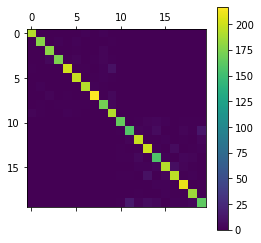

In [ ]:
# plotting confusion matrix (Colorbar)
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix)
plt.colorbar()
plt.show()

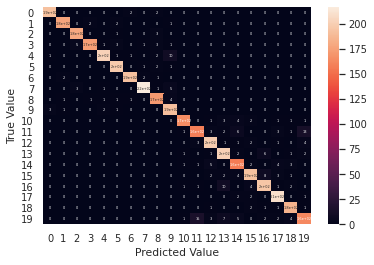

In [ ]:
# plotting confusion matrix (Seaborn)
import seaborn as sn
import matplotlib.pyplot as plt

cm = pd.DataFrame(confusion_matrix, range(20), range(20))
sn.set(font_scale=0.9) # for label size
a = sn.heatmap(cm, annot=True, annot_kws={"size": 3.5}, color = 'white')

a.set(xlabel='Predicted Value', ylabel='True Value')

plt.savefig('/content/gdrive/My Drive/HDR/confusion_mat.png', dpi=400)

plt.show()